In [ ]:
# HOW TO USE
# In the 3rd cell, edit FLAG_IMAGE to use the filename of the flag you want Oren to hold
# Run the Jupyter notebook (requires Jupyter, Python 3, OpenCV, Numpy, and Matplotlib)
# The result will be saved as "result.jpg"

In [144]:
# Load the mapping arrays
import cv2
import numpy as np
from matplotlib import pyplot as plt

data = np.load("image_transformers.npz")
map_x = data['map_x']
map_y = data['map_y']

In [ ]:
FLAG_IMAGE = cv2.imread("us_flag.png")      # <--- Change this to the image you want to use
TARGET_IMAGE = cv2.imread("oren_esn_base.jpg")
MASK_IMAGE = cv2.imread("oren_esn_mask.jpg")

In [146]:
def resize_with_padding(image, target_size, padding_color=(0, 0, 0)):
    """Resizes an image while maintaining aspect ratio and adding padding."""

    # Get original image dimensions
    height, width, _ = image.shape

    # Calculate aspect ratio and determine new dimensions
    aspect_ratio = width / float(height)
    if width > height:
        new_width = target_size[0]
        new_height = int(target_size[0] / aspect_ratio)
    else:
        new_height = target_size[1]
        new_width = int(target_size[1] * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    # Calculate padding values
    delta_w = target_size[0] - new_width
    delta_h = target_size[1] - new_height

    # Add padding to the image
    padded_image = cv2.copyMakeBorder(resized_image, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT, value=padding_color)

    return padded_image

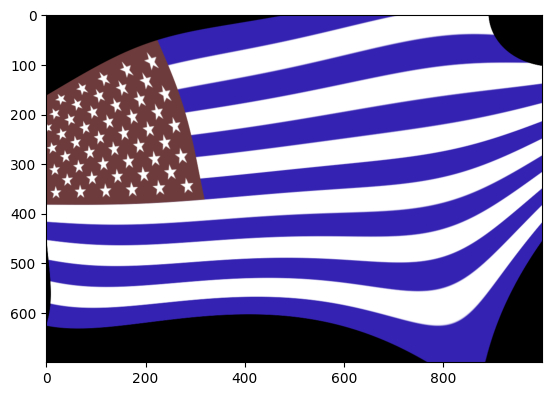

In [147]:
# Transform the flag image to 1000x600
FLAG_IMAGE = cv2.resize(FLAG_IMAGE, (1000, 600))

# Apply the mapping arrays to the flag image
dst = cv2.remap(FLAG_IMAGE, map_x, map_y, cv2.INTER_LINEAR)
plt.imshow(dst)

# Crop the width of dst to match the width of the target image
dst = dst[:, :TARGET_IMAGE.shape[1]]

# Pad bottom of dst with black to match the height of the target image
dst = resize_with_padding(dst, (TARGET_IMAGE.shape[1], TARGET_IMAGE.shape[0]))

True

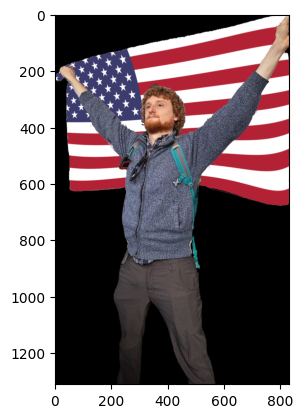

In [148]:
# Apply mask to target image, and put the flag in the unmasked area
MASK_IMAGE = cv2.resize(MASK_IMAGE, (TARGET_IMAGE.shape[1], TARGET_IMAGE.shape[0]))
MASK_IMAGE = cv2.cvtColor(MASK_IMAGE, cv2.COLOR_BGR2GRAY)
MASK_IMAGE = cv2.bitwise_not(MASK_IMAGE)
MASK_IMAGE = cv2.merge((MASK_IMAGE, MASK_IMAGE, MASK_IMAGE))

masked_flag = cv2.bitwise_and(dst, MASK_IMAGE)
masked_target = cv2.bitwise_and(TARGET_IMAGE, cv2.bitwise_not(MASK_IMAGE))
result_img = cv2.add(masked_flag, masked_target)

# Display the result
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
cv2.imwrite("result.jpg", result_img)